# Assignment 2
The objective of this assignment is to get you familiarizewith  the  problems  of  `classification`  and  `verification`with a popular problem space of `face`

This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Allowed Libraries
- All libraries are allowed 

## Datasets 
- 3 datasets are provided. Load the data from the drive [link](!https://drive.google.com/file/d/1ujsKv9W5eidb4TXt1pnsqwDKVDFtzZTh/view?usp=sharing).
- Unzip the downloaded file and store the files in a folder called `datasets`. Keep the `datasets` folder in the same directory as of the jupyter notebook 

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.
- Upload  the  notebook,  report  and  classification  results as a zip file to moodle. Name the zip file as `<rollnumber>_assignment2.zip`

In [1]:
# Installing Libraries
# !pip install scikit-learn matplotlib Pillow

In [2]:
# Basic Imports
import os
import sys
import warnings
import numpy as  np
import pandas as pd
from scipy import linalg

# Loading and plotting data
from PIL import Image
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Features
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.discriminant_analysis import _class_means,_class_cov
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE


plt.ion()
%matplotlib inline

# Parameters
- Image size: Bigger images create better representation but would require more computation. Choose the correct image size based on your Laptop configuration. 
- is_grayscale: Should you take grayscale images? Or rgb images? Choose whichever gives better representation for classification. 

In [3]:
opt = {
    'image_size': 32,
    'is_grayscale': False,
    'val_split': 0.75
}
dir_list = ['./dataset/IMFDB/','./dataset/IIIT-CFW/','./dataset/Yale_face_database/']
datasets = ['IMFDB','CFW','Yale']

### Load Dataset

In [4]:
cfw_dict = {'Amitabhbachan': 0,
    'AamirKhan': 1,
    'DwayneJohnson': 2,
    'AishwaryaRai': 3,
    'BarackObama': 4,
    'NarendraModi': 5,
    'ManmohanSingh': 6,
    'VladimirPutin': 7}

imfdb_dict = {'MadhuriDixit': 0,
     'Kajol': 1,
     'SharukhKhan': 2,
     'ShilpaShetty': 3,
     'AmitabhBachan': 4,
     'KatrinaKaif': 5,
     'AkshayKumar': 6,
     'Amir': 7}

# Load Image using PIL for dataset
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

# Load the full data from directory
def load_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_dict

    elif "yale" in dir_path.lower():
        label_dict = {}
        for i in range(15):
            label_dict[str(i+1)] = i
    elif "IMFDB" in dir_path:
        label_dict = imfdb_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

#     print("Dataset shape:",image_list.shape)

    return image_list,y_list

# Display N Images in a nice format
def disply_images(imgs,classes,row=1,col=2,w=64,h=64):
    fig=plt.figure(figsize=(8, 8))
    for i in range(1, col*row +1):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)

        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)

        plt.title("Class:{}".format(classes[i-1]))
        plt.axis('off')
    plt.show()

In [5]:
# Loading the dataset
# eg.
dirpath = './dataset/IMFDB/'
X,y = load_data(dirpath)
N,H,W = X.shape[0:3]
C = 1 if opt['is_grayscale'] else X.shape[3]

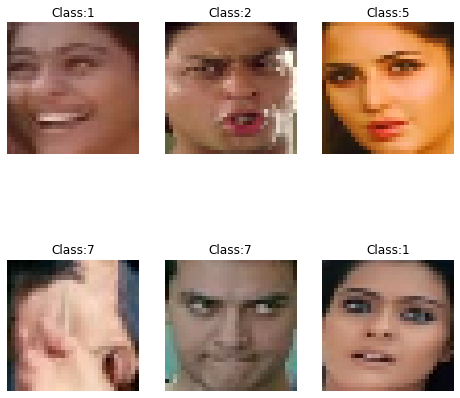

In [6]:
# Show sample images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X[ind,...],y[ind], row=2,col=3)

# Features
    You are provided 6 Features. These features are:
   - Eigen Faces / PCA 
   - Kernel PCA
   - Fisher Face / LDA
   - Kernel Fisher Face
   - VGG Features 
   - Resnet Features

**VGG and Resnet features are last layer features learned by training a model for image classification**
    
---


In [7]:
# Flatten to apply PCA/LDA
X = X.reshape((N,H*W*C))

###  1. Eigen Face:
Use principal component analysis to get the eigen faces. 
Go through the [documentation](!http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) on how to use it

In [8]:
def get_pca(X_train,k,inverse=False,X_test = None,return_test = False):
    """
        Get PCA of K dimension using the top eigen vectors 
    """
    pca = PCA(n_components=k)
    X_train_k = pca.fit_transform(X_train)
    if(inverse):
        X_train_k = pca.inverse_transform(X_train_k)
    if(return_test == False):
        return X_train_k
    else:
        X_test_k = pca.transform(X_test)
        return X_train_k,X_test_k

###  2. Kernel Face:
Use Kernel principal component analysis to get the eigen faces. 

There are different kernels that can be used. Eg. Poly, rbf, sigmoid. Choose the whichever gives the best result or representation. See [link](!https://data-flair.training/blogs/svm-kernel-functions/) for better understanding of these kernels  

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA) on how to use it different kernels in Sklearn. 

In [9]:
def get_kernel_pca(X_train, k,kernel='rbf', degree=3,X_test = None,return_test = False):
    """
        Get PCA of K dimension using the top eigen vectors 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use (“linear” | “poly” | “rbf” | “sigmoid” | “cosine” )
        @param: d => Degree for poly kernels. Ignored by other kernels
    """
    kpca = KernelPCA(n_components=k,kernel=kernel,degree=degree)
    X_train_k = kpca.fit_transform(X_train)
    if(return_test == False):
        return X_train_k
    else:
        X_test_k = kpca.transform(X_test)
        return X_train_k,X_test_k

### 3. Fisher Face
Another method similar to the eigenface technique is `fisherfaces` which uses linear discriminant analysis.
This method for facial recognition is less sensitive to variation in lighting and pose of the face than using eigenfaces. Fisherface uses labelled data to retain more of the class-specific information during the dimension reduction stage.

Go through the [documentation](!https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html) on how to use it different kernels in Sklearn. 

In [10]:
def get_lda(X_train,y,k,X_test = None,return_test = False):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
    """
    lda = LDA(n_components=k)
    X_train_k = lda.fit_transform(X_train,y)
    if(return_test == False):
        return X_train_k
    else:
        X_test_k = lda.transform(X_test)
        return X_train_k,X_test_k

### 4. Kernel Fisher Face
Use LDA using different kernels similiar to KernelPCA. Here the input is directly transformed instead of using the kernel trick.  

In [11]:
def get_kernel_lda(X_train,y,k,kernel='rbf',degree=2,X_test = None,return_test = False):
    """
        Get LDA of K dimension 
        @param: X => Your data flattened to D dimension
        @param: k => Number of components
        @param: kernel => which kernel to use ( “poly” | “rbf” | “sigmoid”)
    """
    # Transform  input
    if kernel == "poly":
        X_transformed = X_train**degree
    elif kernel == "rbf":
        var = np.var(X)
        X_transformed= np.exp(-X_train/(2*var))
    elif kernel == "sigmoid":
        X_transformed = np.tanh(X_train)
    else: 
        raise NotImplementedError("Kernel {} Not defined".format(kernel))
        
    klda = LDA(n_components=k)
    X_train_k = klda.fit_transform(X_transformed,y)
    if(return_test == False):
        return X_train_k
    else:
        X_test_k = klda.transform(X_test)
        return X_train_k,X_test_k

### 5. VGG Features
VGG Neural Networks a 19 layer CNN architecture introduced by Andrew Zisserman([Link](!https://arxiv.org/pdf/1409.1556.pdf) to paper). We are providing you with the last fully connected layer of this model.

The model was trained for face classification on each dataset and each feature the dimension of 4096.

In [12]:
def get_vgg_features(dirpath):
    features = np.load(os.path.join(dirpath,"VGG19_features.npy"))
    return features

### 6. Resnet Features

[Residual neural networks](!https://arxiv.org/pdf/1512.03385.pdf) are CNN with large depth, to effectively train these netwrorks they utilize skip connections, or short-cuts to jump over some layers. This helps solving [vanishing gradient problem](!https://en.wikipedia.org/wiki/Vanishing_gradient_problem) 

A 50 layer resnet model was trained for face classification on each dataset. Each feature the dimension of 2048

In [13]:
def get_resnet_features(dirpath):
    features = np.load(os.path.join(dirpath,"resnet50_features.npy"))
    return features

# Questions

1(a). What are eigen faces? 

___________________________

Dataset of faces when projected to the eigenvectors of its covariance matrix gives features along these eigenvectors that are called eigenfaces.


1(b).  How many eigen vec-tors/faces are required to “satisfactorily” reconstruct a  person  in  these  three  datasets? (Don’t  forget  to make your argument based on eigen value spectrum) Show appropriate graphs, qualitative examples andmake a convincing argument.

In [14]:
# Compute your features 
# eg.
X_3D = get_kernel_lda(X,y,3)

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


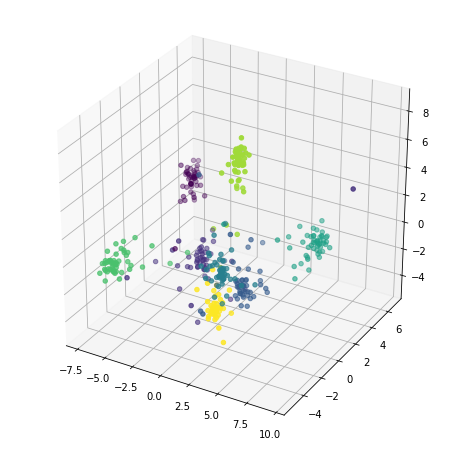

In [15]:
# Create a scatter plot  
# eg.
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3D[:,0],X_3D[:,1],X_3D[:,2],c=y)

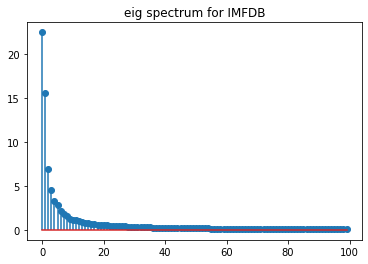

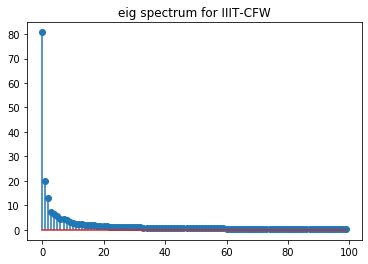

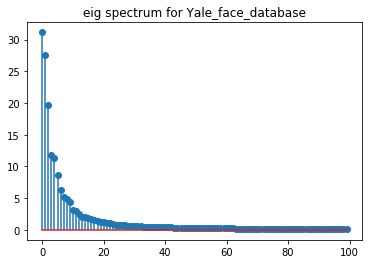

In [16]:
# Plot the eigen value spectrum
def get_eigval(threshold = 0.9,dirpath = './dataset/IMFDB'):
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    eigval,_ = linalg.eig(np.cov(X.T))
    plt.stem(np.real(eigval[:100]),use_line_collection=True)
    plt.title("eig spectrum for " + dirpath.split('/')[2])
    plt.show()
    eigval = eigval/np.sum(eigval)
    num_eigval = np.sum(np.cumsum(eigval) <= threshold)
    return num_eigval
eignum_IMFDB = get_eigval(dirpath = './dataset/IMFDB')
eignum_CFW = get_eigval(dirpath = './dataset/IIIT-CFW')
eignum_Yale = get_eigval(dirpath = './dataset/Yale_face_database/')
eignum_list = np.array([eignum_IMFDB,eignum_CFW,eignum_Yale])

1(c). Reconstruct  the  image  back for each case


In [17]:
def reconstruct_images(X,k):
    """
        Reconstruct the images back by just using the selected principal components. 


        You have to write the code in this code block.
        You can change the functions provided above (eg, get_pca, get_lda) for your use case. 
            
        @params: 
                Input parameters

        @return reconstructed_X => reconstructed image
        
    """
    reconstruct_X = get_pca(X,k,inverse = True)
    
    return reconstruct_X    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


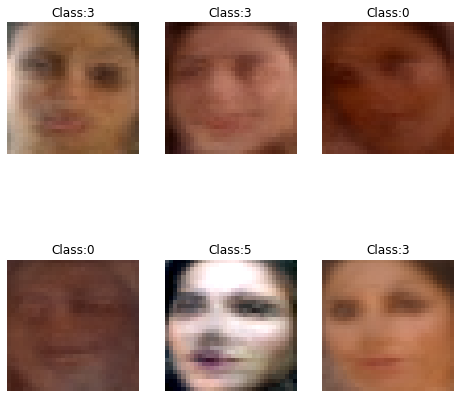

0.0829252996228564


In [18]:
# Display results 
X_reconstructed = reconstruct_images(X,20)
# Display random images
ind = np.random.randint(0,y.shape[0],6)
disply_images(X_reconstructed.reshape(N,H,W,C)[ind,...],y[ind],row=2,col=3)
# Show the reconstruction error
print(np.sqrt(np.mean((X - X_reconstructed)**2)))

1(d). Which person/identity is difficult to represent com-pactly with fewer eigen vectors?  Why is that?  Explain with your empirical observations and intuitive answers

### Faces that are difficult to reconstruct

In [19]:
# code goes here
for i in range(len(dir_list)):
    X,y = load_data(dir_list[i])
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    X_reconstructed = reconstruct_images(X,eignum_list[i])
    errors = np.zeros(8)
    for j in range(8):
        errors[j] = np.sqrt(np.mean((X[y==j,:] - X_reconstructed[y==j,:])**2))
    idx = np.argmax(errors)
    if(i==0): 
        print(list(imfdb_dict.keys())[idx],"has the highest reconstruction error in",datasets[i],"dataset")
    elif(i==1):
        print(list(cfw_dict.keys())[idx],"has the highest reconstruction error in",datasets[i],"dataset")
    elif(i==2):
        print(idx,"has the highest reconstruction error in",datasets[i],"dataset")

ShilpaShetty has the highest reconstruction error in IMFDB dataset
ManmohanSingh has the highest reconstruction error in CFW dataset
7 has the highest reconstruction error in Yale dataset


### Dataset that is difficult to reconstruct

In [20]:
err = []
for i in range(len(dir_list)):
    X,y = load_data(dir_list[i])
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    X_reconstructed = reconstruct_images(X,eignum_list[i])
    err.append(np.sqrt(np.mean((X - X_reconstructed)**2)))
err = np.array(err)
print(datasets[np.argmax(err)],"dataset has the highest reconstruction error")

CFW dataset has the highest reconstruction error


2(a). Use any classifier(MLP, Logistic regression, SVM, Decision Trees) and find the classification accuracy. 

2(b)Which method works well? Do a comparitivestudy. 


You already know the paper [Face Recognition Us-ing  Kernel  Methods](!http://face-rec.org/algorithms/Kernel/nips01.pdf) .See  this  as  an  example for empirical analysis of different features/classification.

In [21]:
# Define your classifier here. You can use libraries like sklearn to create your classifier 
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.svm import SVC,LinearSVR
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix as confMat
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

def preprocess(X,y,k,feature_type = 1,kernel='rbf',degree=3,test_size = 0.2):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    if (feature_type == 1):
        X_train,X_test = get_pca(X_train,k,X_test = X_test,return_test=True)
    elif (feature_type == 2):
        X_train,X_test = get_kernel_pca(X_train,k,kernel,degree,X_test = X_test,return_test=True)
    elif (feature_type == 3):
        X_train,X_test = get_lda(X_train,y_train,k,X_test = X_test,return_test=True)
    elif (feature_type == 4):
        X_train,X_test = get_kernel_lda(X_train,y_train,k,kernel,degree,X_test = X_test,return_test=True)

    return X_train,X_test,y_train,y_test

class Classifier():
    def __init__(self,hidden_layer_sizes = (100,50)):
#         super.__init__()
    # Define your parameters eg, W,b, max_iterations etc. 
        self.hidden_layer_sizes = hidden_layer_sizes
    def classify(self,X):
        """
            Given an input X classify it into appropriate class. 
        """
        prediction = self.model.predict(X)
        return prediction
        
    def confusion_matrix(self,pred,y):
        """
            A confusion matrix is a table that is often used to describe the performance of a classification
            model (or “classifier”) on a set of test data for which the true values are known.
            
            
            @return confusion_matrix => num_classesxnum_classes martix 
                where confusion_matrix[i,j] = number of prediction which are i and number of ground truth value equal j 
        
        """
        return confMat(y,pred)
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """

#         self.model = SVC(C = self.C,cache_size=5000,kernel = self.kernel,gamma='auto')
        self.model = MLPClassifier(hidden_layer_sizes=self.hidden_layer_sizes,max_iter=10000,activation='relu',solver='adam')
        self.model.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is the classifier on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters and judge the classification
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your classifier validated. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        y_pred = self.classify(X_validate)
        Val_acc = accuracy_score(y_validate,y_pred,normalize = True)
        
        precision = precision_score(y_validate,y_pred,average = 'macro')
        recall = recall_score(y_validate,y_pred,average = 'macro')
        f1 = f1_score(y_validate,y_pred,average = 'macro')

        # Create a confusion matrix
        
        # Calculate Validation accuracy 
    
        # Calculate precision and recall 
        
        # Calculate F1-score
    
        return Val_acc,precision,recall,f1

In [22]:
# Create a train and validation split to train your classifier 
X_train,X_test,y_train,y_test = preprocess(X,y,k = 40,feature_type =2,kernel='poly',degree=2,test_size = 0.2)

In [41]:
clf = Classifier(hidden_layer_sizes=(100,50,25))
clf.train(X_train,y_train)
pred = clf.classify(X_test)
print("Accuracy when kpca_poly of degree 2 done on input data is fed to a MLP classifier is",np.sum(pred == y_test)*100/len(y_test))

Accuracy when kpca_poly of degree 2 done on input data is fed to a MLP classifier is 99.53488372093024


In [24]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, classification error, accuracy, f1-score
type_array = np.array([1,3,2,2,4,4])
degree_array = np.array([3,3,2,3,2,3])
kernel_list = ['rbf','rbf','poly','poly','poly','rbf']
feature_list = ['PCA','LDA','KPCA_poly d = 2','KPCA_poly d=3','KLDA_poly d=2','KLDA_rbf']

def faces_table(dirpath = './dataset/IMFDB',gray = 0,flag = 1):
    global k_array,opt
    if(gray == 1):
        opt['is_grayscale'] = True
    else:
        opt['is_grayscale'] = False
    if(flag == 1):
        k_array = np.array([66,7,66,66,7,7])
    elif(flag == 2):
        k_array = np.array([207,7,207,207,7,7])
    if(flag == 3):
        k_array = np.array([34,14,34,34,14,14])
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    
    acc = np.zeros(6)
    f1 = np.zeros(6)
    
    for i in range(6):
        X_train,X_test,y_train,y_test = preprocess(X,y,k = k_array[i],feature_type = type_array[i],kernel = kernel_list[i],degree = degree_array[i],test_size = 0.2)
        clf = Classifier(hidden_layer_sizes = (100,50,25))
        clf.train(X_train,y_train)
        pred = clf.classify(X_test)
        acc[i],_,_,f1[i] = clf.validate(X_test,y_test)
    
    acc = 100*acc
    clf_err = 100 - acc
    best_model = np.argmax(acc)
    df = pd.DataFrame({
        'Method' : pd.Categorical(feature_list),
        'Reduced Space' : k_array ,
        'Classification error' : clf_err ,
        'Accuracy' : acc ,
        'f1-score' : f1 })
    return df,best_model
# Print the table. (You can use Pandas)
best_models = np.zeros(3)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("\nIMFDB")
    df1,best_models[0] = faces_table('./dataset/IMFDB/',flag=1)
    print(df1)
    print("\nCFW")
    df2,best_models[1] = faces_table('./dataset/IIIT-CFW/',flag=2)
    print(df2)
    print("\nYale")
    df3,best_models[2] = faces_table('./dataset/Yale_face_database/',flag=3)
    print(df3)


IMFDB
            Method  Reduced Space  Classification error  Accuracy  f1-score
0              PCA             66                 23.75     76.25  0.758875
1              LDA              7                 26.25     73.75  0.729950
2  KPCA_poly d = 2             66                 18.75     81.25  0.811602
3    KPCA_poly d=3             66                 25.00     75.00  0.758627
4    KLDA_poly d=2              7                 90.00     10.00  0.116019
5         KLDA_rbf              7                 93.75      6.25  0.029598

CFW
            Method  Reduced Space  Classification error   Accuracy  f1-score
0              PCA            207             48.148148  51.851852  0.512873
1              LDA              7             68.148148  31.851852  0.298239
2  KPCA_poly d = 2            207             38.518519  61.481481  0.601049
3    KPCA_poly d=3            207             40.740741  59.259259  0.580900
4    KLDA_poly d=2              7             88.888889  11.111111  0.0


 KPCA_poly d = 2 for IMFDB


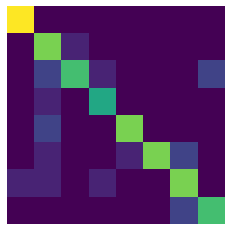


 KPCA_poly d = 2 for CFW


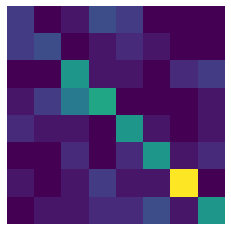


 LDA for Yale


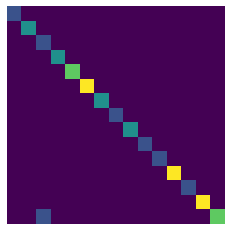

In [25]:
# For each dataset print the confusion matrix for the best model 
# print(best_models)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for i in range(3):
        X,y = load_data(dir_list[i])
        N,H,W = X.shape[0:3]
        C = 1 if opt['is_grayscale'] else X.shape[3]
        X = X.reshape((N,H*W*C))
        j = best_models[i].astype('uint')
        X_train,X_test,y_train,y_test = preprocess(X,y,k = k_array[j],feature_type = type_array[j],kernel = kernel_list[j],degree = degree_array[j],test_size = 0.2)
        clf = Classifier(hidden_layer_sizes=(100,50,25))
        clf.train(X_train,y_train)
        pred = clf.classify(X_test)
        print("\n",feature_list[j],"for",datasets[i])
        plt.imshow(clf.confusion_matrix(pred,y_test))
        plt.axis('off')
        plt.show()

3. Similiar to 1(b) use t-SNE based visilization of faces?  Does it makesense?  Do you see similar people coming together?or something else?  Can you do visualization datasetwise and combined? Here you will use a popular implementation.(Worth  reading and understanding  t-SNE.  We  will not discuss it in the class and out of scope for thiscourse/exams.

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


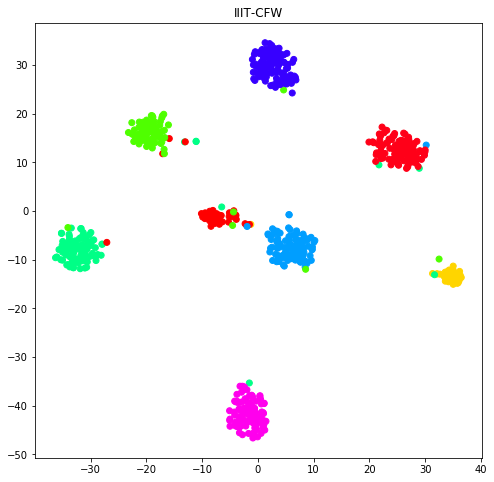

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


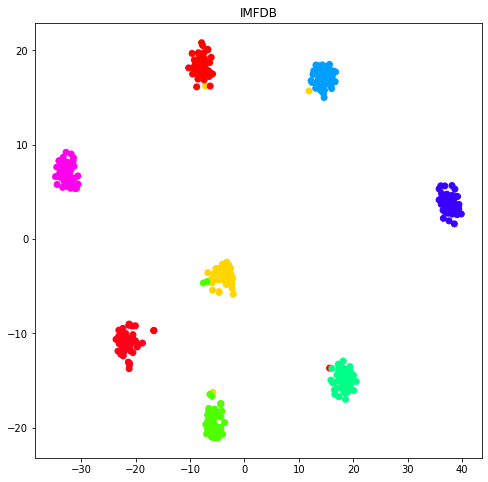

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


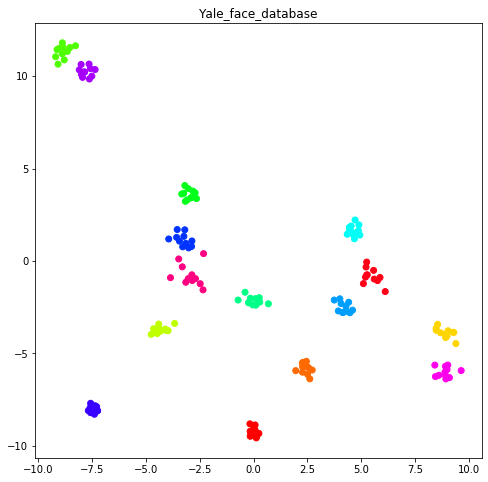

In [81]:
# Compute TSNE for different features and create a scatter plot

# X =  # feature 
k = 2 # Number of components in TSNE

# Compute
def plot_tsne(k=2,dirpath = './dataset/IMFDB'):
    fig = plt.figure(figsize=(8,8))
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = get_lda(X.reshape((N,H*W*C)),y,7)
    X_TSNE = TSNE(n_components=k).fit_transform(X)
    if(k==2):
        ax = fig.add_subplot(111)
        scatter1 = ax.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y,cmap = 'hsv')
    elif(k==3):
        ax = fig.add_subplot(111, projection='3d')
        scatter1 = ax.scatter(X_TSNE[:,0],X_TSNE[:,1],X_TSNE[:,2],c=y,cmap = 'hsv')
    plt.title(dirpath.split('/')[2])
    plt.show()
# Plot the representation in 2d/3d
k = 2
plot_tsne(k=k,dirpath='./dataset/IIIT-CFW/')
plot_tsne(k=k,dirpath='./dataset/IMFDB/')
plot_tsne(k=k,dirpath='./dataset/Yale_face_database/')

C:\Users\anike\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


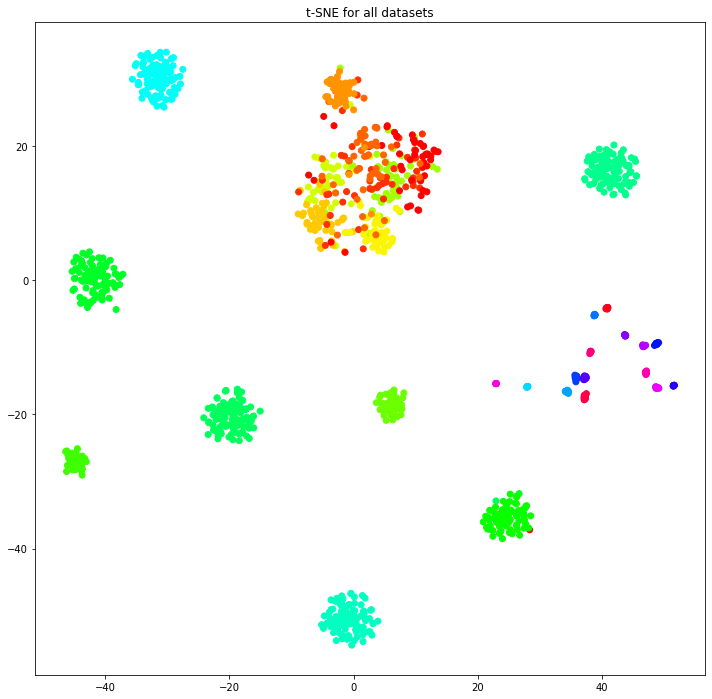

In [80]:
k = 2
fig = plt.figure(figsize=(12,12))
X1,y1 = load_data('./dataset/IMFDB')
N,H,W = X1.shape[0:3]
C = 1 if opt['is_grayscale'] else X1.shape[3]
X1 = X1.reshape((N,H*W*C))
X2,y2 = load_data('./dataset/IIIT-CFW')
N,H,W = X2.shape[0:3]
C = 1 if opt['is_grayscale'] else X2.shape[3]
X2 = X2.reshape((N,H*W*C))
X3,y3 = load_data('./dataset/Yale_face_database/')
N,H,W = X3.shape[0:3]
C = 1 if opt['is_grayscale'] else X3.shape[3]
X3 = X3.reshape((N,H*W*C))
X_all = np.vstack((X1,X2,X3))
# print(X_all.shape,X3.shape)
# X_all = np.vstack((X_all,X3))
y_all = np.hstack((y1,y2+8,y3+16))
X_TSNE = TSNE(n_components=k).fit_transform(get_lda(X_all,y_all,7))
if(k==2):
    ax = fig.add_subplot(111)
    scatter = plt.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y_all,cmap='hsv')
elif(k==3):
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_TSNE[:,0],X_TSNE[:,1],X_TSNE[:,2],c=y_all,cmap='hsv')
plt.title("t-SNE for all datasets")
plt.show()

4.`face`  is  used  for  verification.   

4(a) How do we formulate the problem using KNN 

4(b) How do we analyze the performance ? suggest  the  metrics  (like  accuracy) that is appropriate for this task.

_______________________________________________________________________

4(c)Show empirical re-sults  with  all  the  representations

In [27]:
from sklearn.neighbors import KNeighborsClassifier as knn

class FaceVerification():
    def __init__(self,k=7):
#         super.__init__()
        self.n_neighbors = k
    # Define your parameters eg, W,b, max_iterations etc. 
    
    def verify(self,X,class_id):
        """
            Given an input X find if the class id is correct or not.
            
            @return verfication_results => N vector containing True or False. 
                    If the class-id matches with your prediction then true else false.   
        """
        pred = self.model.predict(X)
        verification_results = (pred == class_id)
        return verification_results
        
    def train(self,X_train,y_train):
        """
            Given your training data, learn the parameters of your classifier
            
            @param X_train => NxD tensor. Where N is the number of samples and D is the dimension. 
                                it is the data on which your verification system will be trained. 
                                It can be any combination of features provided above.

            @param y_train => N vector. Ground truth label 
    
            @return Nothing
        """
        self.model = knn(n_neighbors = self.n_neighbors)
        self.model.fit(X_train,y_train)
        
    def validate(self,X_validate,y_validate):
        """
            How good is your system on unseen data? Use the function below to calculate different metrics. 
            Based on these matrix change the hyperparmeters
            
            @param X_validate => NxD tensor. Where N is the number of samples and D is the dimension. 
                                It can be any combination of features provided above.

            @param y_validate => N vector. Ground truth label 
            
        """
        acc = np.mean(self.verify(X_validate,y_validate))
        acc = acc*100
        err = 100 - acc
        precision = precision_score(y_validate,self.model.predict(X_validate),average = 'macro')
        return err,acc,precision

In [28]:
# Create a train and validation split and show your results 
# Done in preprocess function

In [29]:
# Create 3 tables simiar to page-6 of the paper. One table per dataset 
# Each table will have 5 columns. 
# Feature/combination of feature used, reduced dimension space, verification error, accuracy, precision
k_array = np.array([40,7,40,40,7,7])
type_array = np.array([1,3,2,2,4,4])
degree_array = np.array([3,3,2,3,2,3])
kernel_list = ['rbf','rbf','poly','poly','poly','rbf']
feature_list = ['PCA','LDA','KPCA_poly d = 2','KPCA_poly d=3','KLDA_poly d=2','KLDA_rbf']

def knn_faces_table(dirpath = './dataset/IMFDB',flag = 0):
    k = 7
    global k_array,opt
    if(flag == 1):
        opt['is_grayscale'] = True
    else:
        opt['is_grayscale'] = False
    if(flag == 2):
        k_array = np.array([40,14,40,40,14,14])
        k = 15
    X,y = load_data(dirpath)
    N,H,W = X.shape[0:3]
    C = 1 if opt['is_grayscale'] else X.shape[3]
    X = X.reshape((N,H*W*C))
    
    err = np.zeros(6)
    acc = np.zeros(6)
    precision = np.zeros(6)
    
    for i in range(6):
        X_train,X_test,y_train,y_test = preprocess(X,y,k = k_array[i],feature_type = type_array[i],kernel = kernel_list[i],degree = degree_array[i],test_size = 0.2)
        clf = FaceVerification(k=k)
        clf.train(X_train,y_train)
        err[i],acc[i],precision[i] = clf.validate(X_test,y_test)
    
    df = pd.DataFrame({
        'Method' : pd.Categorical(feature_list),
        'Reduced Space' : k_array ,
        'verification error' : err ,
        'Accuracy' : acc ,
        'precision' : precision })
    return df
# Print the table. (You can use Pandas)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("\nIMFDB")
    df1 = knn_faces_table('./dataset/IMFDB/')
    print(df1)
    print("\nCFW")
    df2 = knn_faces_table('./dataset/IIIT-CFW/')
    print(df2)
    print("\nYale")
    df3 = knn_faces_table('./dataset/Yale_face_database/',flag=2)
    print(df3)


IMFDB
            Method  Reduced Space  verification error  Accuracy  precision
0              PCA             40               35.00     65.00   0.733187
1              LDA              7               15.00     85.00   0.821635
2  KPCA_poly d = 2             40               40.00     60.00   0.689433
3    KPCA_poly d=3             40               53.75     46.25   0.523100
4    KLDA_poly d=2              7               83.75     16.25   0.086533
5         KLDA_rbf              7               87.50     12.50   0.016234

CFW
            Method  Reduced Space  verification error   Accuracy  precision
0              PCA             40           54.814815  45.185185   0.532565
1              LDA              7           66.666667  33.333333   0.336869
2  KPCA_poly d = 2             40           48.888889  51.111111   0.517216
3    KPCA_poly d=3             40           51.111111  48.888889   0.471692
4    KLDA_poly d=2              7           89.629630  10.370370   0.075288
5      

### Extenstion / Application
    Create a system for any one of the following problems:

- Politicians  vs  Filmstars  in  a  public  data  set.   (eg.LFW)
        You already have seen IIIT-CFW dataset. Use it for classification. 
- Age prediction
        Given different actors/actress in IMFDB create new labels based on their age.  
- Gender prediction
        Given different actors/actress in IMFDB+IIIT-CFW create new labels based on their gender.
- Emotion classification
        Both the yale dataset and IMFDB contain an `emotion.txt` file. Using that you can create a emotion predicter 
- cartoon vs real images
        Use a combination of IIIT-CFW and other dataset. 
        


You are free to use a new dataset that is publicly avail-able or even create one by crawling from internet.

In [82]:
cfw_gender_dict = {'Amitabhbachan': 0,
    'AamirKhan': 0,
    'DwayneJohnson': 0,
    'AishwaryaRai': 1,
    'BarackObama': 0,
    'NarendraModi': 0,
    'ManmohanSingh': 0,
    'VladimirPutin': 0}

imfdb_gender_dict = {'MadhuriDixit': 1,
     'Kajol': 1,
     'SharukhKhan': 0,
     'ShilpaShetty': 1,
     'AmitabhBachan': 0,
     'KatrinaKaif': 1,
     'AkshayKumar': 0,
     'Amir': 0}
def load_gender_data(dir_path):
    image_list = []
    y_list = []
    
    if "CFW" in dir_path:
        label_dict = cfw_gender_dict
    elif "IMFDB" in dir_path:
        label_dict = imfdb_gender_dict
    else:
        raise KeyError("Dataset not found.")
    
    
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            y = filename.split('_')[0]
            y = label_dict[y] 
            image_list.append(im)
            y_list.append(y)
        else:
            continue

    image_list = np.array(image_list)
    y_list = np.array(y_list)

#     print("Dataset shape:",image_list.shape)

    return image_list,y_list

X1 = get_resnet_features('./dataset/IMFDB')
_,y1 = load_gender_data('./dataset/IMFDB/')
X2 = get_resnet_features('./dataset/IIIT-CFW/')
_,y2 = load_gender_data('./dataset/IIIT-CFW/')
X = np.vstack((X1,X2))
y = np.hstack((y1,y2))
X.shape

(1072, 2048)

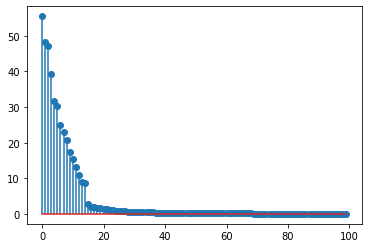

In [83]:
eigval,eigvec = linalg.eig(np.cov(X[:,:X.shape[1]-1].T))
plt.stem(np.real(eigval[:100]),use_line_collection=True)
plt.show()

In [84]:
# Define your features
X_train,X_test,y_train,y_test = preprocess(X,y,k = 40,feature_type = 1,kernel='poly',degree=2,test_size = 0.2)

In [85]:
# Create your classifier
clf = Classifier(hidden_layer_sizes=(1000,1000))
# Validate your classifier
clf.train(X_train,y_train)
pred = clf.classify(X_test)

Accuracy :  99.53488372093024 
k-fold Validation accuracy for num_folds = 3: [81.00558659 64.14565826 98.59943978] 



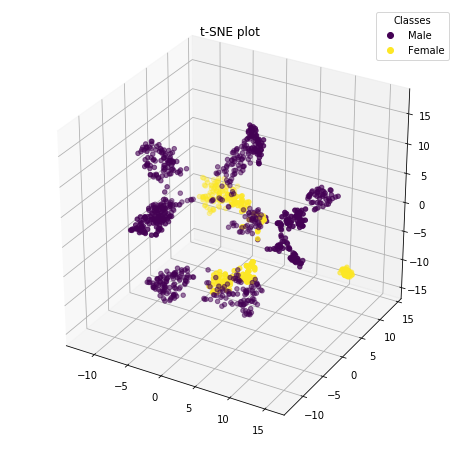

In [88]:
# Show qualitative results such as accuracy, k-fold validation, TSNE/PCA/Isomap plots, etc.  
from sklearn.model_selection import cross_val_score

acc = np.mean(pred == y_test)
kf_acc = cross_val_score(MLPClassifier(hidden_layer_sizes=(1000,1000),max_iter=10000,activation='relu',solver='adam'),X,y,cv = 3)
print("Accuracy : ",acc*100,"\nk-fold Validation accuracy for num_folds = 3:",kf_acc*100,"\n")
k = 3
X_TSNE = TSNE(n_components=k).fit_transform(get_pca(X,40))
fig = plt.figure(figsize=(8,8))
if(k==2):
    ax = fig.add_subplot(111)
    scatter = plt.scatter(X_TSNE[:,0],X_TSNE[:,1],c=y)
elif(k==3):
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X_TSNE[:,0],X_TSNE[:,1],X_TSNE[:,2],c=y)
handles,_ = scatter.legend_elements()
labels = ['Male','Female']
ax.legend(handles,labels,title='Classes')
plt.title('t-SNE plot')
plt.show()

In [35]:
# Show quantitative results such as examples of correct prediction and wrong prediction
gender_dict = {
    "Male" : 0,
    "Female" : 1
}
div = len(y1) # elements in X before div belong to IMFDB and vice versa
X_1,_ = load_gender_data('./dataset/IMFDB')
X_2,_ = load_gender_data('./dataset/IIIT-CFW')
def disp_im(idx,pred_arr,ax = None):
    global div,pred
    if(idx<div):     
        if(ax == None):
            plt.imshow(X_1[idx])
        else:
            ax.imshow(X_1[idx])
    else:
        idx1 = idx - 400
        if(ax == None):
            plt.imshow(X_2[idx1])
        else:
            ax.imshow(X_2[idx1])
    plt.title(list(gender_dict.keys())[pred_arr[idx]])

In [36]:
pred1 = clf.classify(get_pca(X,40))

In [37]:
from matplotlib import gridspec
import math
num_im = 2
def correct_incorrect_im(num_im = 2):
    cols = min(num_im,6)
    rows = int(math.ceil(num_im / cols))
    gs = gridspec.GridSpec(rows,cols)
    correct_pred = np.arange(len(y))[pred1 == y]
    idx_c = correct_pred[np.random.choice(correct_pred.shape[0],num_im,replace=True)]
    incorrect_pred = np.arange(len(y))[pred1 != y]
    idx_inc = incorrect_pred[np.random.choice(incorrect_pred.shape[0],num_im,replace=True)]
    print("Correctly classified images")
    fig1 = plt.figure(figsize = (20,20))
    for i in range(num_im):
        ax1 = fig1.add_subplot(gs[i])
        disp_im(idx_c[i],pred1,ax1)
        ax1.axis('off')
    fig1.tight_layout()
    plt.show()
    print("Incorrectly classified images")
    fig2 = plt.figure(figsize=(20,20))
    for i in range(num_im):
        ax2 = fig2.add_subplot(gs[i])
        disp_im(idx_inc[i],pred1,ax2)
        ax2.axis('off')
    fig2.tight_layout()
    plt.show()

Correctly classified images


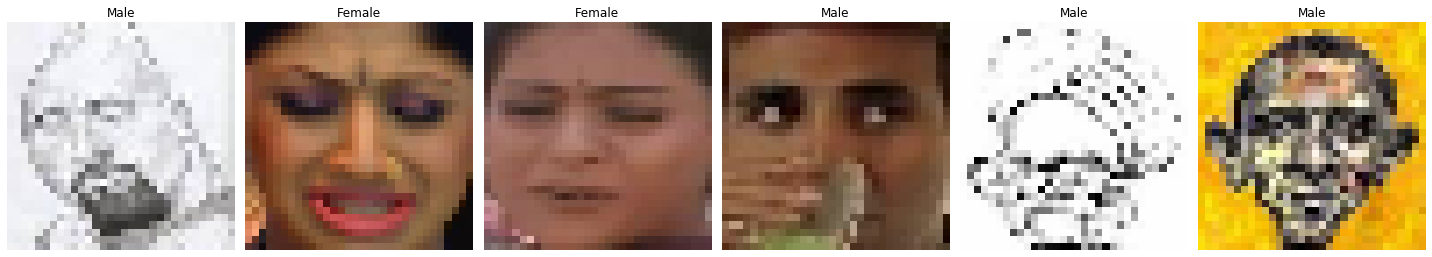

Incorrectly classified images


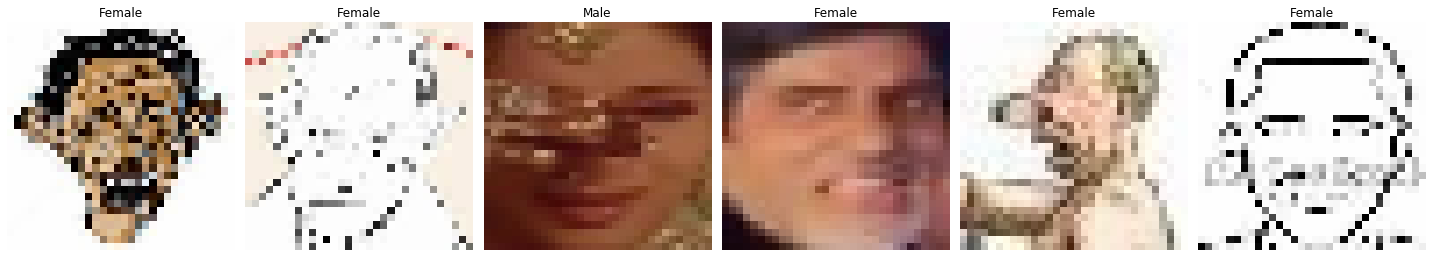

In [90]:
correct_incorrect_im(num_im = 6)